# Shots

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Shooting Skill

In [73]:
df = pd.read_csv("../data/understat/2021-22/shots.csv")
player = 'Mohamed Salah'
xg = df.loc[(df.player == player) & (df.season >= 2017)]
xg = xg.reset_index()

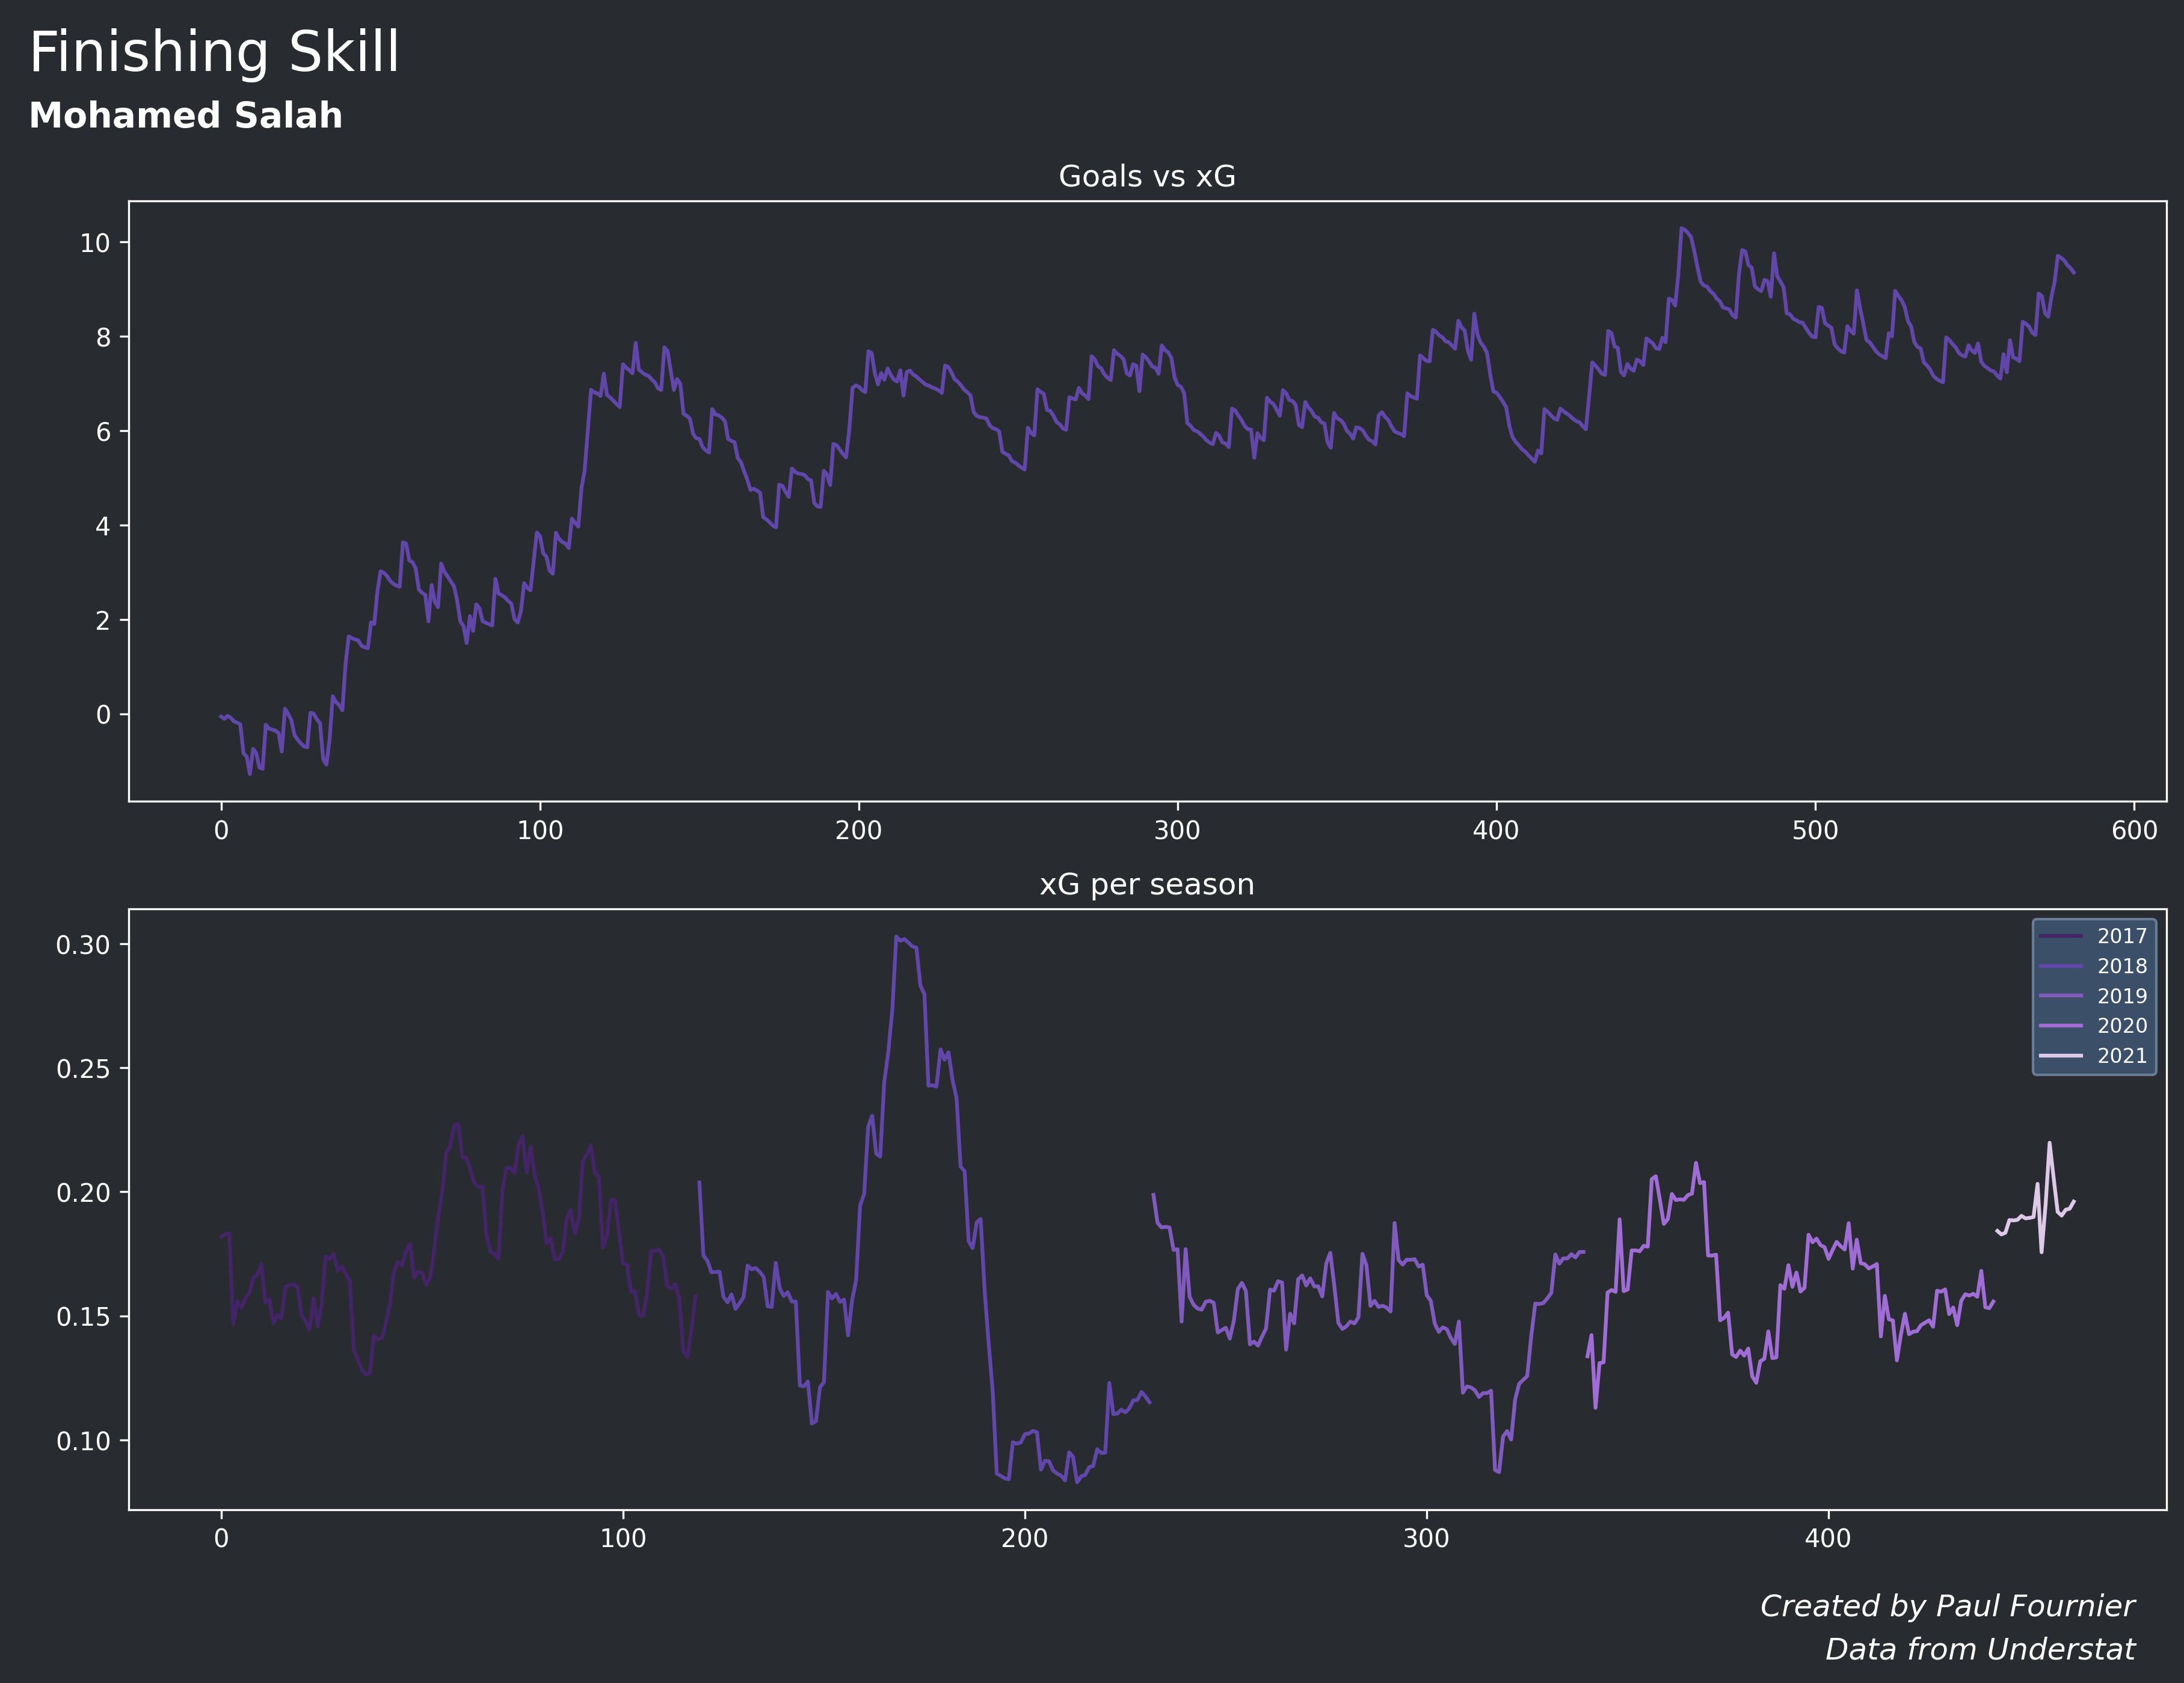

In [74]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

# Difference between xG and Goals
axs[0].plot(
    np.cumsum(xg.result == 'Goal') - np.cumsum(xg.xG),
    color='#6247aa')
axs[0].title.set_text('Goals vs xG')

# xG per season
ma = np.convolve(
    xg.loc[xg.season == 2017].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(0, len(ma)),
    ma,
    color='#432466')
last = len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2018].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#6247aa')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2019].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#815ac0')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2020].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#a06cd5')
last += len(ma)

ma = np.convolve(
    xg.loc[xg.season == 2021].xG,
    np.ones(25)/25,
    mode='valid')
axs[1].plot(
    np.arange(last, last + len(ma)),
    ma,
    color='#dec9e9')

legend = axs[1].legend(
    prop={'size': 8},
    labels=['2017', '2018', '2019', '2020', '2021'],
    frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('#415A77')
frame.set_edgecolor('#778DA9')
axs[1].title.set_text('xG per season')

fig_text(
    x=0., y=1.075,
    s=f"Finishing Skill",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0., y=1.025,
    s=f"{player}",
    fontweight="bold",
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)
fig_text(
    x=0.83, y=-0.025,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)


plt.tight_layout()
plt.show()

# Shooting Location

In [75]:
from mplsoccer import VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

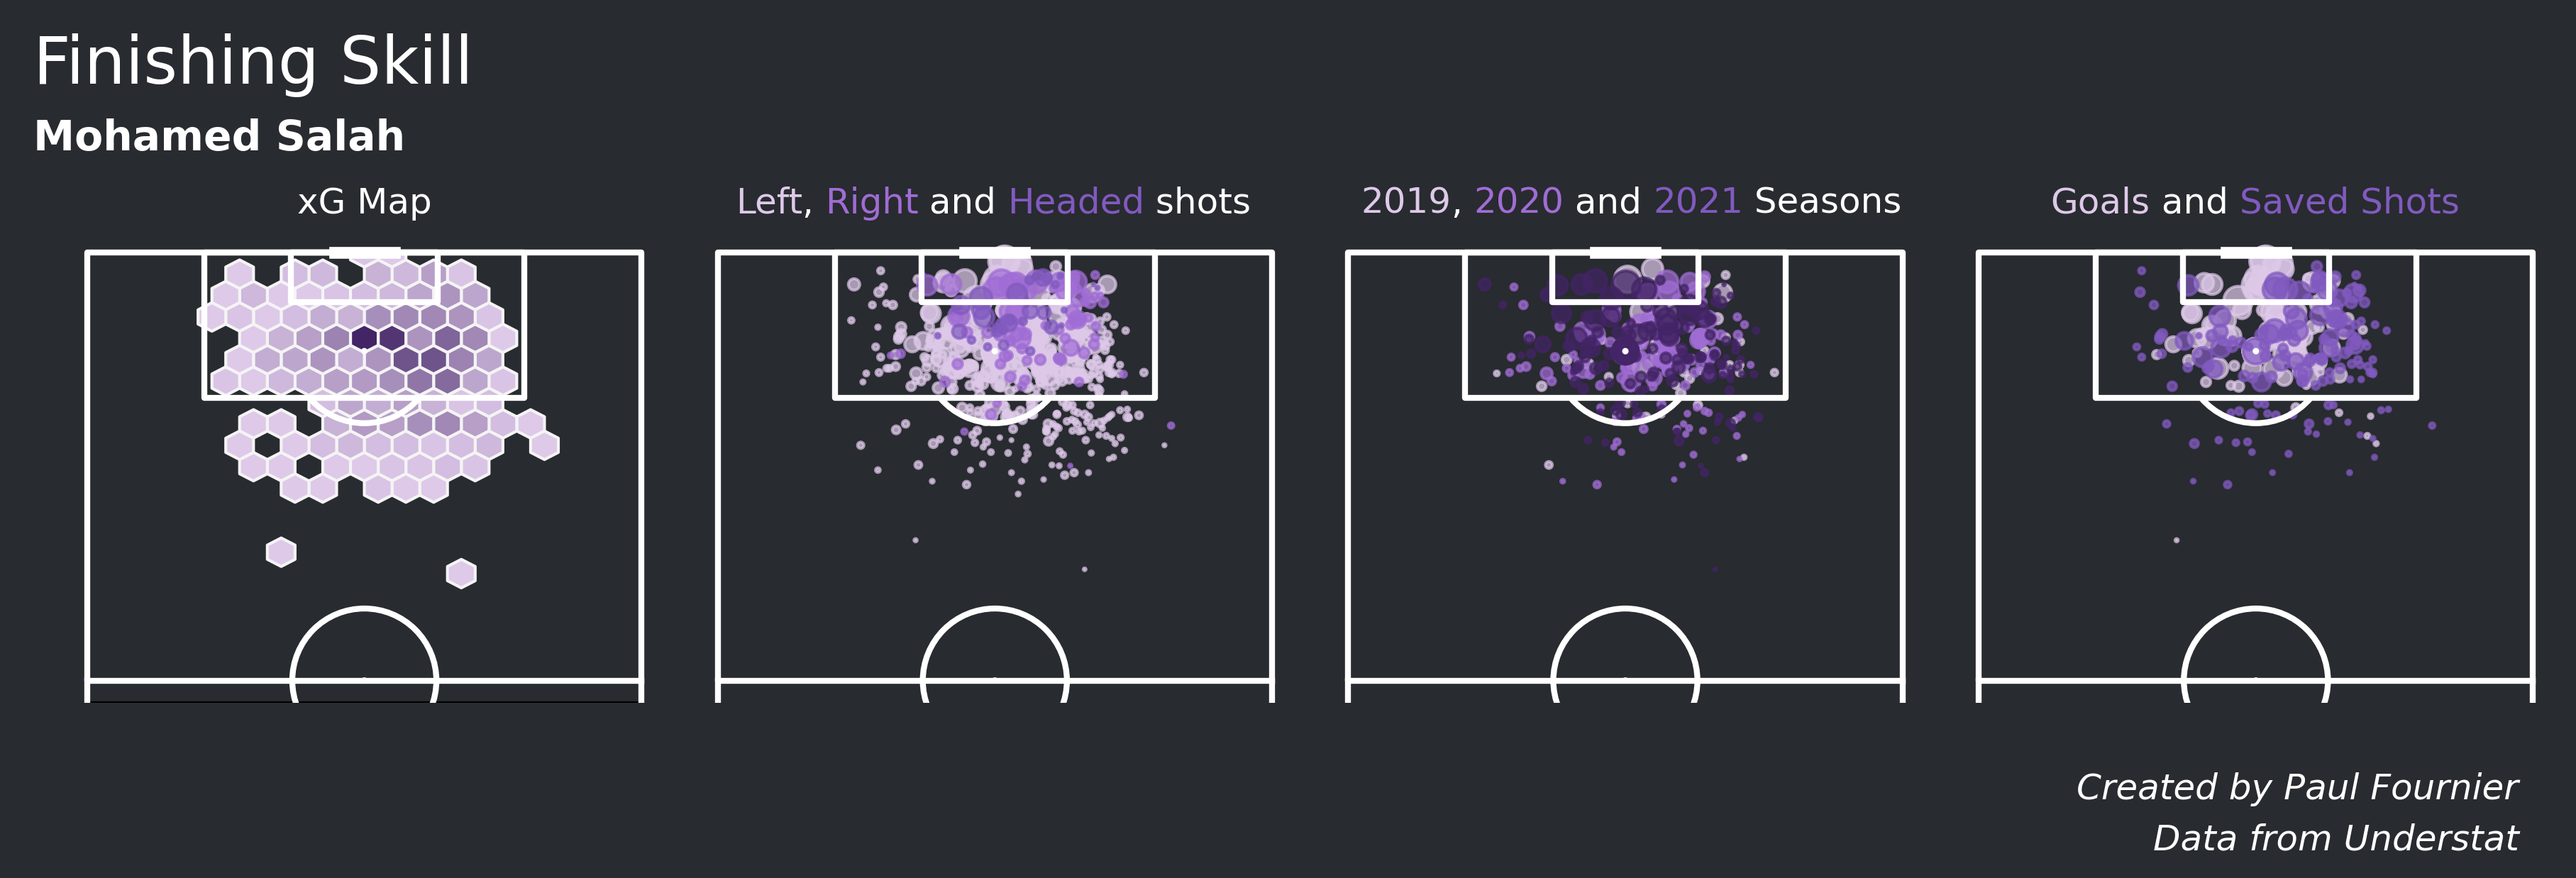

In [76]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)
axs[2].patch.set_alpha(0)
axs[3].patch.set_alpha(0)

pitch = VerticalPitch(
    pitch_type='opta',
    line_color='#FFFFFF',
    half=True,
    line_zorder=5,
    pitch_color=background,
)
pitch.draw(ax=axs[0])
pitch.draw(ax=axs[1])
pitch.draw(ax=axs[2])
pitch.draw(ax=axs[3])

cmap_100 = LinearSegmentedColormap.from_list(
    "Pearl Earring - 100 colors",
    ['#dec9e9', '#432466'],
    N=100)

pitch.hexbin(
    xg.X*100, xg.Y*100,
    ax=axs[0],
    edgecolors='#f4f4f4', gridsize=(20, 20), cmap=cmap_100)
axs[0].title.set_text('xG Map')

pitch.scatter(
    xg.loc[xg.shotType == 'LeftFoot'].X*100,
    xg.loc[xg.shotType == 'LeftFoot'].Y*100,
    s=xg.loc[xg.shotType == 'LeftFoot'].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[1])
pitch.scatter(
    xg.loc[xg.shotType == 'RightFoot'].X*100,
    xg.loc[xg.shotType == 'RightFoot'].Y*100,
    s=xg.loc[xg.shotType == 'RightFoot'].xG*100,
    c='#a06cd5', alpha=.7, ax=axs[1])
pitch.scatter(
    xg.loc[xg.shotType == 'Head'].X*100,
    xg.loc[xg.shotType == 'Head'].Y*100,
    s=xg.loc[xg.shotType == 'Head'].xG*100,
    c='#815ac0', alpha=.7, ax=axs[1])
fig_text(
    x=0.275, y=0.665,
    s="<Left>, <Right> and <Headed> shots",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#a06cd5'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

pitch.scatter(
    xg.loc[xg.season == 2021].X*100,
    xg.loc[xg.season == 2021].Y*100,
    s=xg.loc[xg.season == 2021].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[2])
pitch.scatter(
    xg.loc[xg.season == 2020].X*100,
    xg.loc[xg.season == 2020].Y*100,
    s=xg.loc[xg.season == 2020].xG*100,
    c='#a06cd5', alpha=.7, ax=axs[2])
pitch.scatter(
    xg.loc[xg.season == 2019].X*100,
    xg.loc[xg.season == 2019].Y*100,
    s=xg.loc[xg.season == 2019].xG*100,
    c='#432466', alpha=.7, ax=axs[2])
fig_text(
    x=0.52, y=0.665,
    s="<2019>, <2020> and <2021> Seasons",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#a06cd5'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

pitch.scatter(
    xg.loc[xg.result == "Goal"].X*100,
    xg.loc[xg.result == "Goal"].Y*100,
    s=xg.loc[xg.result == "Goal"].xG*100,
    c='#dec9e9', alpha=.7, ax=axs[3])
pitch.scatter(
    xg.loc[xg.result == "SavedShot"].X*100,
    xg.loc[xg.result == "SavedShot"].Y*100,
    s=xg.loc[xg.result == "SavedShot"].xG*100,
    c='#815ac0', alpha=.7, ax=axs[3])
fig_text(
    x=0.79, y=0.665,
    s="<Goals> and <Saved Shots>",
    highlight_textprops=[
        {"color": '#dec9e9'},
        {"color": '#815ac0'},
        ],
    fontsize=12, fontfamily=title_font,
    color=text_color, alpha=1)

fig_text(
    x=0., y=0.755,
    s=f"Finishing Skill",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0., y=0.705,
    s=f"{player}",
    fontweight="bold",
    fontsize=14, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    0.8, 0.305,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)
fig_text(
    0.83, 0.275,
    s="Data from <Understat>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=12, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()